<h2><center>Logistic Regression -Deep Neuron AI </center></h2>

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader as DataLoader
from torch.autograd import Variable

from ipywidgets import IntProgress

In [2]:
# download datasets
train_dataset = datasets.MNIST(root = "./data/",
                            transform=transforms.ToTensor(),
                            train = True,
                            download = True)

100.0%


Extracting ./data/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\raw



100.0%


Extracting ./data/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\raw



100.0%


Extracting ./data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\raw



100.0%

Extracting ./data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\raw



In [3]:
print(len(train_dataset)) # 60000 differebt digits in this data set
print(train_dataset[0])
print(type(train_dataset[0])) #| tuple

60000
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

In [4]:
# Input Matrix
train_dataset[0][0].size() # 28x28

torch.Size([1, 28, 28])

In [5]:
# Label
train_dataset[0][1]

5

### Displaying MINIST

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
# train_dataset[0][0] is a tensor, use numpy() turn type.
train_dataset[0][0].numpy().shape # (1, 28, 28)

(1, 28, 28)

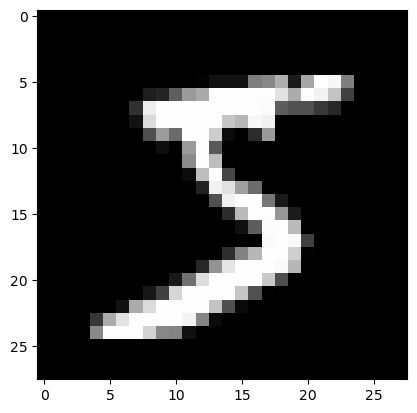

In [8]:
# reshape to (28, 28) for displaying
show_image = train_dataset[0][0].numpy().reshape(28, 28)
# show
plt.imshow(show_image, cmap='gray')

Label: 0


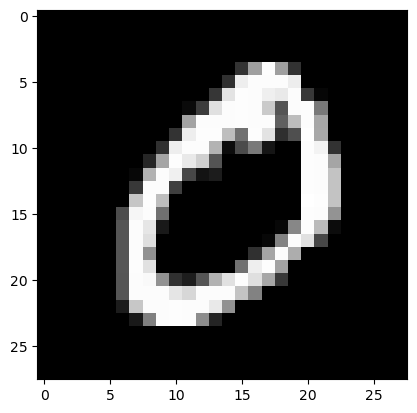

In [9]:
print('Label:', train_dataset[1][1]) # 
plt.imshow(train_dataset[1][0].numpy().reshape(28, 28), cmap='gray')

### Loading MNIST Test Dataset
* We wanto to evaluate our models performance.
* Out-of-sample.

In [10]:
test_dataset = datasets.MNIST(root='./data', 
                              train=False,
                               transform=transforms.ToTensor())

In [11]:
print(len(test_dataset))
print(type(test_dataset[0]))

10000
<class 'tuple'>


In [12]:
# Matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

Label: 2


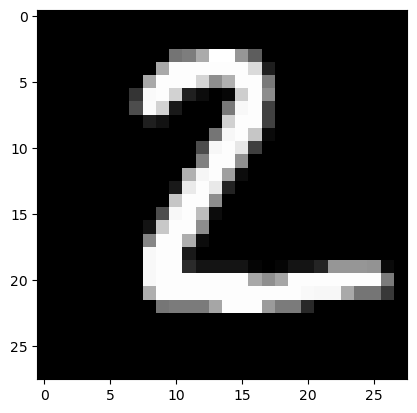

In [13]:
print('Label:', test_dataset[1][1]) # 
plt.imshow(test_dataset[1][0].numpy().reshape(28, 28), cmap='gray')

### Make Dataset Iterable
* total data: 60000
* mini batch: 100 , Number of examples in 1 iteration.
* iterations: 3000, One mini-batch forward and backward pass.
* epoch:
    * 1 epoch: running through the whole dataset once.
    * $ epochs = iterations \div \frac{total data}{mini batch} = 3000\div \frac{60000}{100} = 5 $

In [14]:
batch_size = 100
iteration_n = 3000

In [15]:
epoch_n = int(iteration_n/ (len(train_dataset)/batch_size))
epoch_n

5

In [16]:
# create iterable object: Training dataset and testing dataset
train_loader = DataLoader(dataset=train_dataset,
                           batch_size=batch_size,
                           shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                           batch_size=batch_size,
                           shuffle=True)

In [17]:
# check iterability
import collections
isinstance(train_loader, collections.Iterable) and isinstance(test_loader, collections.Iterable)

C:\Users\deepn\anaconda3\envs\deeptorch\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  This is separate from the ipykernel package so we can avoid doing imports until


True

### Buildgin Model

In [18]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

### Instantiate Model Class
* Input dimension: Size of Image (28 x 28 = 784).
* Output dimension: 10 labels (0, 1, 2, 3, 4, 5, 6, 7, 9)

In [19]:
input_dim = 28 * 28
output_dim = 10
logisticRegressionModel = LogisticRegressionModel(input_dim, output_dim)

### Instantiate Loss Class
* Logistic Regression: Cross Entropy Loss.
* Linear Regression: MSE.

#### nn.CrossEntropyLoss()
1. Computes softmax (logistic/softmax function) and cross entropy.

In [20]:
criterion = nn.CrossEntropyLoss()

#### Instantiate Optimizer Class
* Equation: 
    $$ \theta = \theta - \eta \cdot \nabla_{ \theta} $$

Where $\theta$ is parameters; $\eta$ is learning rate; $\theta$ is parameter's gradients.


Even simplier equation:
- parameters = parameters - learning_rate * parameters_gradients
- At every iteration, we update our model's parameters.

In [21]:
learning_rate = 0.001
optimizer = torch.optim.SGD(logisticRegressionModel.parameters(), lr=learning_rate)

In [22]:
print(logisticRegressionModel.parameters())
print(len(list(logisticRegressionModel.parameters())))

# FC 1 Parameters
print( list(logisticRegressionModel.parameters())[0].size(),
       list(logisticRegressionModel.parameters())[1].size() )

<generator object Module.parameters at 0x0000021DC26A58C8>
2
torch.Size([10, 784]) torch.Size([10])


#### Dot Poduct Review 
1. Example 1:
    * $ A:(100, 10) $ 
    * $ B:(10, 1)$
    * $ A \cdot B = (100, 10) \cdot (10, 1) = (100, 1) $
2. Example 2:
    * $ A:(10, 5) $ 
    * $ B:(5, 2)$
    * $ A \cdot B = (10, 5) \cdot (5, 2) = (10, 2) $

### Train Model
1. Convert Inputs/Labels to Variables
2. Clear gradient buffers
3. Get Output given inputs
4. Get Loss
5. Get gradients w.r.t parameters
6. Update parameters using gradients
7. Repeat

In [23]:
iter = 0
for epoch in range(epoch_n):
    for i, (images, labels) in enumerate(train_loader):
        # load images as Variable
        images = Variable(images.view(-1, 28*28))  # resize
        labels = Variable(labels)
        
        # clear gradients w.r.t parameters
        optimizer.zero_grad()
        
        # forward pass to get output
        outputs = logisticRegressionModel(images)
        
        # calculate loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # getting gradients w.r.t. parameters
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        iter += 1
        if iter % 500 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            
            # iterate through test dataset
            for images, labels in test_loader:
                # load test images to a Torch Variable
                images = Variable(images.view(-1, 28*28)) # resize
                
                # forward pass only to get output
                outputs = logisticRegressionModel(images)
                
                # get predication from maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # total number of labels
                total += labels.size(0)
                
                # total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct // total
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))

C:\Users\deepn\anaconda3\envs\deeptorch\lib\site-packages\ipykernel_launcher.py:46: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').


Iteration: 500. Loss: 1.8150895833969116. Accuracy: 70
Iteration: 1000. Loss: 1.6501541137695312. Accuracy: 76
Iteration: 1500. Loss: 1.3747224807739258. Accuracy: 79
Iteration: 2000. Loss: 1.1328428983688354. Accuracy: 80
Iteration: 2500. Loss: 1.0717930793762207. Accuracy: 81
Iteration: 3000. Loss: 1.025132656097412. Accuracy: 82
